
# Project: Investigate a Patient No Show Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, an investigation of why patient in Brazil did not show up in the appointment was performed, the data has information from 100k medical appointments in Brazil focused on the question of whether or not patients show up for their appointment.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [3]:
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>By checking the data frame information, there is no missing data point for each column, however it is obvious that the data type of certain items are not correct. PatientID should be integer, ScheduledDay should be date type data, AppointmentDay has the same issue. All the other columns, such as Scholarship, Hypertension, Diebetes etc. are integer type data, which is okay for counting values of each corresponding feature of patient, but it makes more sense if they are boolean type data. Furthermore, more steps are required to investigate if there is duplicated input.

### Correct Wrong Data Type and Delete Duplicate Patient ID on the Same Day

In [4]:
# After discussing the structure of the data and any problems that need to be cleaned, 
# the following are the cleaning steps taken to achieve the goal
df['PatientId'] = df['PatientId'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [5]:
# check the data type after executing the code above
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [6]:
# Need to check if there is duplicated appointment made by the same patient, since every appointment will produce a new appointment ID,
# it is necessary to delete the Apointment column and check the duplicated record
df_modify = df.drop('AppointmentID', axis=1)
sum(df_modify.duplicated())

618

In [7]:
# after drop the duplicated patients' appointments, the data needs to be reindexed
df_modify.drop_duplicates(inplace=True)
df_modify.index = range(df_modify.shape[0])

In [8]:
# check the change of reindexing
df_modify.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109909 entries, 0 to 109908
Data columns (total 13 columns):
PatientId         109909 non-null int64
Gender            109909 non-null object
ScheduledDay      109909 non-null datetime64[ns]
AppointmentDay    109909 non-null datetime64[ns]
Age               109909 non-null int64
Neighbourhood     109909 non-null object
Scholarship       109909 non-null int64
Hipertension      109909 non-null int64
Diabetes          109909 non-null int64
Alcoholism        109909 non-null int64
Handcap           109909 non-null int64
SMS_received      109909 non-null int64
No-show           109909 non-null object
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 10.9+ MB


>So far the data in the dataframe has no missing data, duplicated items and incorrect data type, the three typical data analysis issues.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Can patient's gender be a factor causing the "No-show"?

In [9]:
# starting with the gender of patients, use pandas query to generate two dataframe for female and male patients
df_genderF = df_modify.query('Gender == "F"')
df_genderM = df_modify.query('Gender == "M"')

In [10]:
# get the total female patient number and total male patient number
F_total = df_genderF.shape[0]
M_total = df_genderM.shape[0]
F_total, M_total

(71424, 38485)

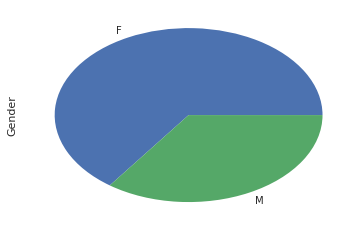

In [11]:
# visualize the ratio of female patient number to that of male patient number
df_modify['Gender'].value_counts().plot(kind='pie');

In [12]:
# Since female and male patient numbers have obvious difference, so simply counting the 'Yes' or 'No' for each dataframe for any
# conclusion is not scientific accurate. It makes more sense to calculate the absence percentage for each gender.
df_genderF['No-show'].value_counts()

No     56966
Yes    14458
Name: No-show, dtype: int64

In [13]:
df_genderM['No-show'].value_counts()

No     30838
Yes     7647
Name: No-show, dtype: int64

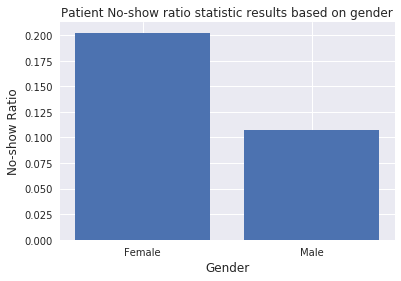

In [14]:
# calculate the ratio and visualize the results
F_yes = df_genderF['No-show'].value_counts()[1]
M_yes = df_genderM['No-show'].value_counts()[1]
F_absence_ratio = F_yes/F_total
M_absence_ratio = M_yes/F_total
plt.bar(['Female', 'Male'], [F_absence_ratio, M_absence_ratio]);
plt.xlabel('Gender', fontsize=12)
plt.ylabel('No-show Ratio', fontsize=12)
plt.title('Patient No-show ratio statistic results based on gender');

>It shows the female patient has a higher possibility of "No-show"

### Research Question 2 Is the age of patients a factor indicating the chance of 'No-show" or not?

In [15]:
# It is helpful to see the age distribution of the patients
df_modify['Age'].describe()

count    109909.000000
mean         37.086472
std          23.121491
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [16]:
# this seems not correct, age cannot be negative; 
# while according to world record, the longest human lifespan is 122, so 115 will be kept
df_modify.query('Age == -1')

PatientId Gender        ScheduledDay AppointmentDay  Age  \
99257  465943158731293      F 2016-06-06 08:58:13     2016-06-06   -1   

      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
99257         ROMÃO            0             0         0           0        0   

       SMS_received No-show  
99257             0      No

In [17]:
# presumably, it should be 0
df_modify.set_value(99257,'Age',0)
df_modify.iloc[99257]

PatientId             465943158731293
Gender                              F
ScheduledDay      2016-06-06 08:58:13
AppointmentDay    2016-06-06 00:00:00
Age                                 0
Neighbourhood                   ROMÃO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
Name: 99257, dtype: object

In [18]:
# plot the histogram of age
df_modify['Age'].describe()

count    109909.000000
mean         37.086481
std          23.121476
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [19]:
# Create a new column called "Age_distribution"
bin_edges = [0, 18, 37, 55, 115]
bin_names = ['Age_25%', 'Age_50%', 'Age_75%', 'Age_Max']
df_modify['Age_distribution'] = pd.cut(df_modify['Age'], bin_edges, labels=bin_names)
df_modify.head()

PatientId Gender        ScheduledDay AppointmentDay  Age  \
0   29872499824296      F 2016-04-29 18:38:08     2016-04-29   62   
1  558997776694438      M 2016-04-29 16:08:27     2016-04-29   56   
2    4262962299951      F 2016-04-29 16:19:04     2016-04-29   62   
3     867951213174      F 2016-04-29 17:29:31     2016-04-29    8   
4    8841186448183      F 2016-04-29 16:07:23     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show Age_distribution  
0        0             0      No          Age_Max  
1        0             0      No          Age_Max  
2        0             0      No          Age_Max  
3        0             0      No          Age_25%  
4        0             0      No          Age_Max

In [20]:
# the problem of this operation is that the patient has Age equal to 0 will have NA in the 'Age_distribution' column, so that
# needs to be fixed
df_modify.fillna('Age_25%', inplace=True)
df_modify.query('Age == 0').head(5)

PatientId Gender        ScheduledDay AppointmentDay  Age  \
59   71844284745331      F 2016-04-29 08:08:43     2016-04-29    0   
63  236623344873175      M 2016-04-27 10:46:12     2016-04-29    0   
64  188517384712787      M 2016-04-25 13:28:21     2016-04-29    0   
65  271881817799985      M 2016-04-27 10:48:50     2016-04-29    0   
67   86471282513499      F 2016-04-29 08:53:02     2016-04-29    0   

        Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
59          CONQUISTA            0             0         0           0   
63       SÃO BENEDITO            0             0         0           0   
64  ILHA DAS CAIEIRAS            0             0         0           0   
65          CONQUISTA            0             0         0           0   
67     NOVA PALESTINA            0             0         0           0   

    Handcap  SMS_received No-show Age_distribution  
59        0             0      No          Age_25%  
63        0             0      No          Age_25%  
64        0             1      No          Age_25%  
65        0             0      No          Age_25%  
67        0             0      No          Age_25%

In [21]:
# it seems changing the datatype of 'No-show' to int will be very handy for the data analysis, since the mean is the sum of 1 
# over the total number of patients, and name a new dataframe df_v2
mapping = {'Yes': 1, 'No': 0}
df_v2 = df_modify.replace({'No-show': mapping})
#check the change
df_v2.head()

PatientId Gender        ScheduledDay AppointmentDay  Age  \
0   29872499824296      F 2016-04-29 18:38:08     2016-04-29   62   
1  558997776694438      M 2016-04-29 16:08:27     2016-04-29   56   
2    4262962299951      F 2016-04-29 16:19:04     2016-04-29   62   
3     867951213174      F 2016-04-29 17:29:31     2016-04-29    8   
4    8841186448183      F 2016-04-29 16:07:23     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received  No-show Age_distribution  
0        0             0        0          Age_Max  
1        0             0        0          Age_Max  
2        0             0        0          Age_Max  
3        0             0        0          Age_25%  
4        0             0        0          Age_Max

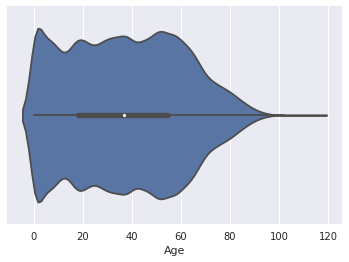

In [22]:
# visualizae the age distribution
sns.violinplot(x=df_v2['Age']);

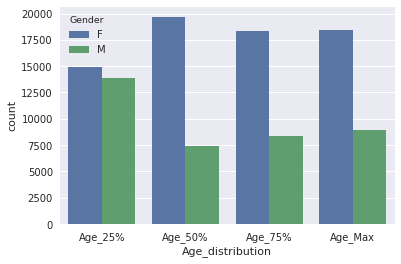

In [23]:
# visualize the gender compostion of patients in each age range
sns.countplot(x=df_v2['Age_distribution'], hue=df_v2['Gender']);

In [24]:
df_v2.groupby('Age_distribution')['No-show'].mean()

Age_distribution
Age_25%    0.219419
Age_50%    0.234418
Age_75%    0.194310
Age_Max    0.155664
Name: No-show, dtype: float64

In [25]:
# it is reasonable to check the sample number in each age distrubution range, since the credibility relies on the sample number
df_v2.groupby('Age_distribution')['No-show'].value_counts()

Age_distribution  No-show
Age_25%           0          22430
                  1           6305
Age_50%           0          20709
                  1           6341
Age_75%           0          21553
                  1           5198
Age_Max           0          23112
                  1           4261
Name: No-show, dtype: int64

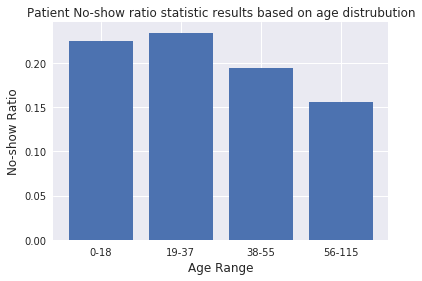

In [26]:
# Data visualization
plt.bar(['0-18', '19-37', '38-55', '56-115'], [0.224925, 0.234418, 0.194310, 0.155664]);
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('No-show Ratio', fontsize=12)
plt.title('Patient No-show ratio statistic results based on age distrubution');

>From the plot above, it shows a pattern that patients below 38 years old has higher "No-show" possibility

### Research Question 3 How does the location of the clinlic/hospitals cause the "No-show"

In [27]:
df_v2['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       7621
MARIA ORTIZ          5804
RESISTÊNCIA          4387
JARDIM DA PENHA      3873
ITARARÉ              3470
CENTRO               3310
TABUAZEIRO           3123
SANTA MARTHA         3103
JESUS DE NAZARETH    2852
BONFIM               2761
Name: Neighbourhood, dtype: int64

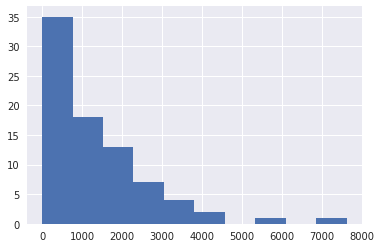

In [28]:
# plot histogram of Neighbourhood value_counts() to see the appointment number distribution based on clinic/hospital sites
df_v2['Neighbourhood'].value_counts().hist()

In [29]:
# Since the appointment number varies in a large range from 1 to 7621 based on location, the comparsion needs selecting certain
# clinics/hospitals which have close and big appointment numbers, here I chose appoint number from 3000 to 4000 and create a new
# data frame called df_v3
location = ["JARDIM DA PENHA", "ITARARÉ", "CENTRO", "TABUAZEIRO", "SANTA MARTHA"]
df_v3 = df_v2.query('Neighbourhood in {}'.format(location))
df_v3['Neighbourhood'].value_counts()


JARDIM DA PENHA    3873
ITARARÉ            3470
CENTRO             3310
TABUAZEIRO         3123
SANTA MARTHA       3103
Name: Neighbourhood, dtype: int64

In [30]:
# calcualtion the mean of "No-show" based groupby Neighbourhood
df_v3.groupby('Neighbourhood')['No-show'].mean()

Neighbourhood
CENTRO             0.209970
ITARARÉ            0.259942
JARDIM DA PENHA    0.162923
SANTA MARTHA       0.157589
TABUAZEIRO         0.181876
Name: No-show, dtype: float64

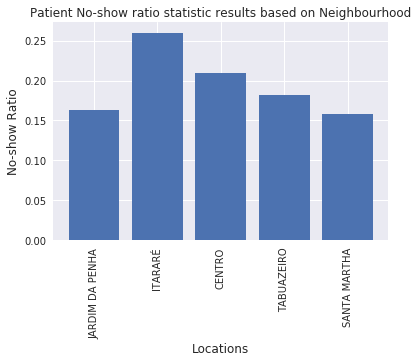

In [31]:
# Data visualization
x = [0,1,2,3,4]
no_show_location = [0.162923, 0.259942, 0.209970, 0.181876, 0.157589]
plt.bar(x, no_show_location);
plt.xticks(x, location, rotation='vertical')
plt.xlabel('Locations', fontsize=12)
plt.ylabel('No-show Ratio', fontsize=12)
plt.title('Patient No-show ratio statistic results based on Neighbourhood');

>From the results above, it can be concluded that the "No-show" is location dependend, certain locations do have higher No-show ratio

### Research Question 4 will the Scholarship enrollment affect the No-show?

In [32]:
# investigate if the enrollment Brasilian welfare program has influence on the the No-show results
df_noscholar = df_modify.query('Scholarship == 0')
df_scholar = df_modify.query('Scholarship == 1')

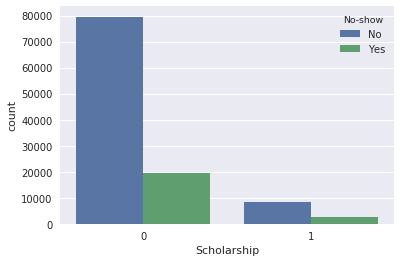

In [33]:
#data visualization
sns.countplot(x=df_modify['Scholarship'],hue=df_modify['No-show']);

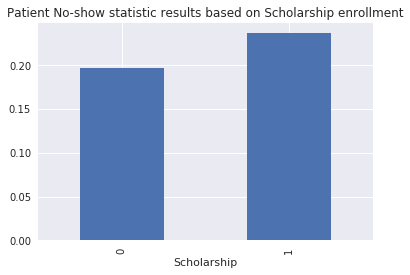

In [34]:
plt.title('Patient No-show statistic results based on Scholarship enrollment');
df_v2.groupby('Scholarship')['No-show'].mean().plot(kind='bar');

> This indicates the Scholar enrollment does not help decreasing the No-show occurrence 

### Research Question 5 Is there any specific day in which patient would like to choose No-show?

In [35]:
# investigate if the day of week schedule made could affect the absence of patients
df_v3.groupby(df_v3['ScheduledDay'].dt.dayofweek).mean()

PatientId        Age  Scholarship  Hipertension  Diabetes  \
ScheduledDay                                                                 
0             1.493474e+14  39.746178     0.082762      0.244597  0.080917   
1             1.405002e+14  38.102115     0.085140      0.219640  0.075999   
2             1.473123e+14  38.722003     0.090382      0.222925  0.077997   
3             1.500016e+14  40.207592     0.081060      0.244761  0.087386   
4             1.461288e+14  40.033140     0.083020      0.230270  0.075504   
5             3.280303e+14  37.200000     0.000000      0.000000  0.000000   

              Alcoholism   Handcap  SMS_received   No-show  
ScheduledDay                                                
0               0.027675  0.024249      0.307327  0.191618  
1               0.031601  0.025594      0.289109  0.192740  
2               0.041370  0.025560      0.314625  0.195520  
3               0.034401  0.032424      0.320680  0.187426  
4               0.038264  0.027673      0.389819  0.206355  
5               0.000000  0.000000      0.200000  0.000000

In [36]:
# Need to check the sample number for each day of week
df_v3['ScheduledDay'].dt.dayofweek.value_counts()

1    3829
2    3795
0    3794
4    2927
3    2529
5       5
Name: ScheduledDay, dtype: int64

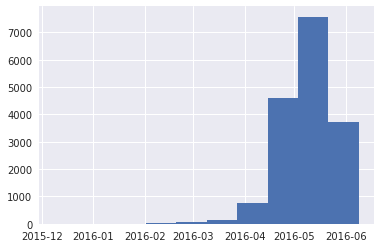

In [37]:
# visualize the result
df_v3['ScheduledDay'].hist();

> First the appointment number is time dependent

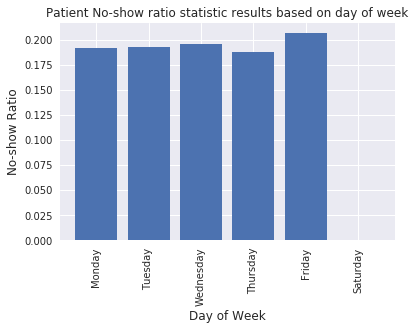

In [38]:
# Data visualization
x = [0,1,2,3,4,5]
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
no_show_dow = [0.191618, 0.192740, 0.195520, 0.187426, 0.206355, 0]
plt.bar(x, no_show_dow);
plt.xticks(x, day_of_week, rotation='vertical')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('No-show Ratio', fontsize=12)
plt.title('Patient No-show ratio statistic results based on day of week');

> It indicates that during the week day the No-show occurrence chance is about 18%,  Friday has a little higher occurrence possibility. Even though only several appointes scheduled on Saturday but no No-show occurred 

### Research Question 6 will the SMS help the No-show less likely taking place?

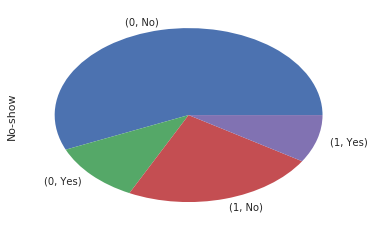

In [39]:
# first glance at the data
df_modify.groupby('SMS_received')['No-show'].value_counts().plot(kind='pie');

In [40]:
#calculate the statistic result based on the dataset
df_v3.groupby('SMS_received')['No-show'].mean()

SMS_received
0    0.155598
1    0.277122
Name: No-show, dtype: float64

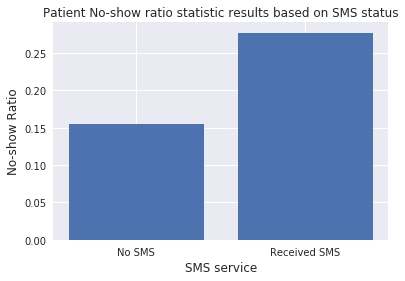

In [41]:
# Data visualization
x = [0,1]
sms = ['No SMS', 'Received SMS']
no_show_sms = [0.155598, 0.277122]
plt.bar(x, no_show_sms);
plt.xticks(x, sms)
plt.xlabel('SMS service', fontsize=12)
plt.ylabel('No-show Ratio', fontsize=12)
plt.title('Patient No-show ratio statistic results based on SMS status');

>This result indicates the SMS did not help decreasing the No-show occurrence

<a id='conclusions'></a>
## Conclusions

### Limitations of dataset
> There are certain limitations in the original dataset: first is the duplicated items, to be specific, there are multiple appoiments for same patient in a given day, which will affect the further statical analysis of the data; second, wrong datatype, which is the ScheduledDay, which hinders the investigation whether the week day could be a causing factor of No-show;
thrid limitation, non-sense data points, which was found in the 'Age' column, there is -1 in the record, which does not make any sense and hinders the calcualtion of the Age distribution of the patients.
To some degree, this dataset could  not effectively represent the overall population, here are the reasons: (1) even though 100K+ patient records, but the male and female patients' number are not in the samiliar scale; (2) by looking at the appointment number based on date, the data shows a seasonal trend, so more info is required to determine the No-show, such as the occurrence of specific diease and which diease would make the patient decide no to show up.

### Findings
>**(1)** Female patients have a higher possibility of "No-show";

>**(2)** Patients below 38 years old has higher "No-show" possibility;

>**(3)** "No-show" is location dependend, certain locations do have higher No-show ratio;

>**(4)** Scholar enrollment does not help decreasing the No-show occurrence.

>**(5)** During the week day the No-show occurrence chance is about 18%,  Friday has a little higher occurrence possibility. Even though only several appointes scheduled on Saturday but no No-show occurred;

>**(6)** result indicates the SMS did not help decreasing the No-show occurrence

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0